# Displaying Images

In [1]:
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import splitfolders

# Split the data
splitfolders.ratio("D:/Term 5 tasks/AMM/Emotion_Detection_CNN-main/data/data",
                   output="D:/Term 5 tasks/AMM/Emotion_Detection_CNN-main/data/data",
                   seed=1337, ratio=(.8, .1, .1))

picture_size = 48
folder_path = "D:/Term 5 tasks/AMM/Emotion_Detection_CNN-main/data/data"
expression = 'disgust'

plt.figure(figsize=(12, 12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "/train/" + expression + "/" +
                   os.listdir(folder_path + "/train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

batch_size = 64

datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path + "/train",
                                              target_size=(picture_size, picture_size),
                                              color_mode="grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

val_set = datagen_val.flow_from_directory(folder_path + "/val",
                                          target_size=(picture_size, picture_size),
                                          color_mode="grayscale",
                                          batch_size=batch_size,
                                          class_mode='categorical',
                                          shuffle=False)

test_s = datagen_val.flow_from_directory(folder_path + "/test",
                                         target_size=(picture_size, picture_size),
                                         color_mode="grayscale",
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)

train_set.class_indices
# ... (rest of the code for testing and evaluation)


# Making Training and Validation Data

In [14]:
# Correct the model architecture

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(picture_size, picture_size, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(rate=0.5),
    Dense(7, activation='softmax')
])

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

epochs = 100

history = model.fit(train_set,
                    validation_data=val_set,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=7)])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 128)        

# save model

In [15]:
# Save the model
model.save("emotion_detection_model.h5")


c:\Users\khale\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
# test the model
from keras.models import load_model
model = load_model("emotion_detection_model.h5")

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Y_pred = model.predict_generator(test_s, test_s.n)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_s.classes, y_pred))
print('Classification Report')
target_names = ['anger', 'contempt', 'disgust',  'fear', 'happy', 'sadness', 'Surprise']
print(classification_report(test_s.classes, y_pred, target_names=target_names))


C:\Users\khale\AppData\Local\Temp\ipykernel_223352\2153971355.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_s, test_s.n // test_s.batch_size+1)


Confusion Matrix
[[14  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0 19  0  0  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  0  0  0 22  0  0]
 [ 0  0  0  0  0  8  1]
 [ 0  0  0  0  0  0 26]]
Classification Report
              precision    recall  f1-score   support

       anger       1.00      1.00      1.00        14
    contempt       1.00      1.00      1.00         6
     disgust       1.00      1.00      1.00        19
        fear       1.00      1.00      1.00         8
       happy       1.00      1.00      1.00        22
     sadness       1.00      0.89      0.94         9
    Surprise       0.96      1.00      0.98        26

    accuracy                           0.99       104
   macro avg       0.99      0.98      0.99       104
weighted avg       0.99      0.99      0.99       104



# plotting

61


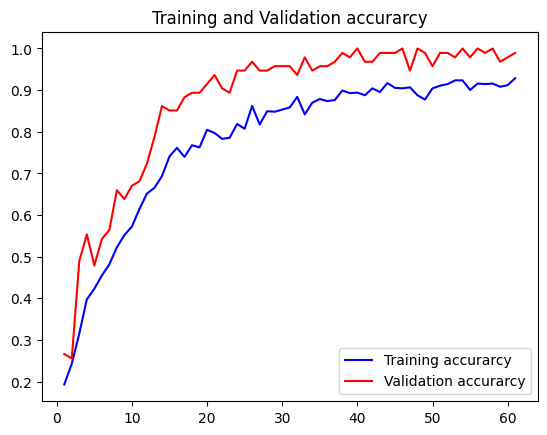

<Figure size 640x480 with 0 Axes>

In [17]:
accuracy = history.history['accuracy']
print(len(accuracy))
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy') 
plt.legend()
plt.figure() # to plot new figure
plt.show()
